In [119]:
import pandas as pd

In [120]:
books = pd.read_csv('./data/books.csv')

In [121]:
books

,title,author,order,rating,publication_year,num_pages
0,The Hunger Games,Suzanne Collins,1,4.32,2008,374
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,2,4.50,2003,870
2,To Kill a Mockingbird,Harper Lee,3,4.28,1960,324
3,Pride and Prejudice,Jane Austen,4,4.27,1813,279
4,Twilight,Stephenie Meyer,5,3.61,2005,501
...,...,...,...,...,...,...
8207,Portrait of an Unknown Woman,Vanora Bennett,8208,3.66,2006,423
8208,Signora Da Vinci,Robin Maxwell,8209,3.90,2008,448
8209,Zoia's Gold,Philip Sington,8210,3.89,2005,389
8210,The Way Back to Florence,Glenn Haybittle,8211,4.19,2015,492


In [122]:
genres = pd.read_csv('./data/genres.csv')

In [123]:
genres

,title,genre
0,The Hunger Games,Fiction
1,The Hunger Games,Dystopia
2,The Hunger Games,Fantasy
3,The Hunger Games,Romance
4,The Hunger Games,Adventure
...,...,...
39074,Artemisia,Historical
39075,Artemisia,Art
39076,Artemisia,Fiction
39077,Artemisia,Cultural


Zanimajo nas le knjige z oceno 4 ali več, ki so izšle po letu 1500

In [124]:
books = books[(books.rating > 4) & (books.publication_year >= 1500)]

In [125]:
books['decade'] = books['publication_year'] // 10 * 10

<ipython-input-125-b48cf624fb20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['decade'] = books['publication_year'] // 10 * 10


In [126]:
decade_count = books.groupby('decade').count()
decade_count = decade_count['title']
decade_count = decade_count.sort_values(ascending=False)

Desetletja z največ uspešnicami 

In [127]:
decade_count.head(10)

decade
2000    770
1990    667
1980    517
2010    397
1970    196
1960    170
1950    152
1940    102
1930     84
1920     60
Name: title, dtype: int64

Komentar: potrdila se je hipoteza, da so najbolj brane knjige sodobne

In [128]:
best_authors = books.groupby('author').count()

In [129]:
best_authors = best_authors[['title']].rename({'title':'count'}, axis=1)

Dvajset najuspešnejših avtorjev

In [130]:
best_authors.sort_values('count', ascending=False).head(20)

,count
author,
Terry Pratchett,45
Nora Roberts,31
Neil Gaiman,21
Stephen King,20
Ellis Peters,17
Tamora Pierce,17
Tony Hillerman,15
Lois McMaster Bujold,13
Michael Connelly,13


Komentar: potrdila se je hipoteza, da so najuspešnejši avtorji večinoma moški

Korelacija letnica-ocena

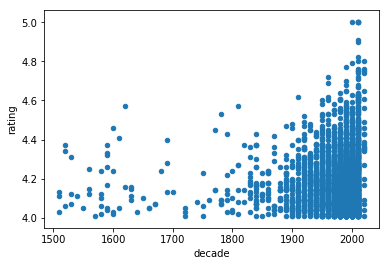

In [131]:
books.plot(kind = 'scatter', x = 'decade', y = 'rating')

Komentar: v nasprotju s predvidevanji vidimo, da z leti ne narašča le število popularnih knjih, temveč tudi njihova ocena

In [132]:
romances = books[books.title.isin(genres[genres.genre == 'Romance'].title)]
romances

,title,author,order,rating,publication_year,num_pages,decade
0,The Hunger Games,Suzanne Collins,1,4.32,2008,374,2000
3,Pride and Prejudice,Jane Austen,4,4.27,1813,279,1810
9,The Fault in Our Stars,John Green,10,4.18,2012,313,2010
10,Gone with the Wind,Margaret Mitchell,11,4.30,1936,1037,1930
16,Memoirs of a Geisha,Arthur Golden,17,4.13,1997,503,1990
...,...,...,...,...,...,...,...
8012,Where the Crawdads Sing,Delia Owens,8013,4.46,2018,384,2010
8110,The V Girl: A Coming of Age Story,Mya Robarts,8111,4.03,2015,338,2010
8113,Fortune Calling,Hunter S. Jones,8114,4.53,2014,23,2010
8147,The Curtain Rises,Mary Burchell,8148,4.02,1969,188,1960


In [133]:
romances['century'] = romances['decade'] // 100 * 100

<ipython-input-133-48d50f2e3477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romances['century'] = romances['decade'] // 100 * 100


In [134]:
romances.head()

,title,author,order,rating,publication_year,num_pages,decade,century
0,The Hunger Games,Suzanne Collins,1,4.32,2008,374,2000,2000
3,Pride and Prejudice,Jane Austen,4,4.27,1813,279,1810,1800
9,The Fault in Our Stars,John Green,10,4.18,2012,313,2010,2000
10,Gone with the Wind,Margaret Mitchell,11,4.30,1936,1037,1930,1900
16,Memoirs of a Geisha,Arthur Golden,17,4.13,1997,503,1990,1900


In [135]:
romances = romances.groupby('century').count()[['title']].rename({'title':'count'}, axis=1)

In [136]:
romances

,count
century,
1500,1
1600,1
1700,2
1800,11
1900,171
2000,251


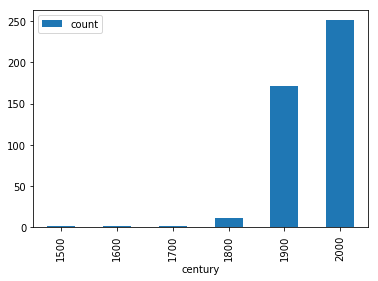

In [137]:
romances.plot(kind = 'bar')

Komentar: največ romantičnih romanov je sodobnih, a to je lahko zgolj posledica dejstva, da je večina knjig na seznamu sodobnih. Oglejmo si, iz katerega časa so ljubezenski romani v relativnem smislu največje uspešnice.

In [138]:
books['century'] = books['decade'] // 100 * 100

<ipython-input-138-538821c1da48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['century'] = books['decade'] // 100 * 100


In [139]:
books.head()

,title,author,order,rating,publication_year,num_pages,decade,century
0,The Hunger Games,Suzanne Collins,1,4.32,2008,374,2000,2000
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,2,4.50,2003,870,2000,2000
2,To Kill a Mockingbird,Harper Lee,3,4.28,1960,324,1960,1900
3,Pride and Prejudice,Jane Austen,4,4.27,1813,279,1810,1800
5,The Book Thief,Markus Zusak,6,4.38,2005,552,2000,2000


In [140]:
century_count = books.groupby('century').count()
century_count = century_count['title']
century_count = century_count.sort_values(ascending=False)

In [141]:
century_count.head()

century
1900    2032
2000    1192
1800     120
1500      27
1700      23
Name: title, dtype: int64

In [142]:
century_count = century_count.reset_index()
century_count.columns = ['century', 'count']
century_count.head()

,century,count
0,1900,2032
1,2000,1192
2,1800,120
3,1500,27
4,1700,23


In [143]:
romances.reset_index(inplace=True)

In [144]:
romances.head()

,century,count
0,1500,1
1,1600,1
2,1700,2
3,1800,11
4,1900,171


In [155]:
romances_percentage = romances.merge(century_count, on='century')
romances_percentage.columns = ['century', 'romances', 'total']
romances_percentage['percentage_of_romances'] = romances_percentage['romances'] / romances_percentage['total']
romances_percentage.sort_values('percentage_of_romances')
romances_percentage

,century,romances,total,percentage_of_romances
0,1500,1,27,0.037037
1,1600,1,22,0.045455
2,1700,2,23,0.086957
3,1800,11,120,0.091667
4,1900,171,2032,0.084154
5,2000,251,1192,0.210570


Relativni delež romantičnih knjig

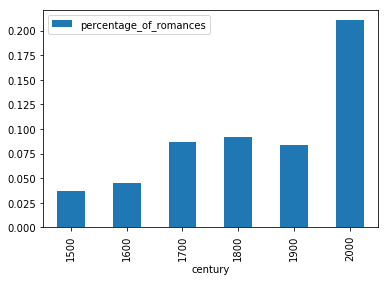

In [156]:
romances_percentage.plot(kind='bar', x='century', y='percentage_of_romances')

Komentar: v nasprotju s predvidevanji je največji delež romantičnih knjig iz 20. stoletja